# ¿Qué se observa si los pasajeros no respetan su boleto?

### Planteamiento del problema:

Existen $n$ pasajeros y $n$ asientos:
1. Cada pasajero subirá y con una probabilidad de $P$ se sentará en el asiento que dice su boleto (si $P= 1$, es el caso organizado).
2. Si el asiento está ocupado, se sentará en cualquier asiento disponible.
3. El último pasajero, $U$, en subir insistirá en sentarse en su asiento.


### Preguntas a responder:
1. ¿Cuál es la probabilidad de que $U$ se siente en su asiento (en función de $P$)?
2. Si $U$ no encuentra disponible su asiento, ¿de qué tamaño es la cascada de cambios (número de cambios de asiento)?
3. ¿Cuál es el número máximo de cambios de asiento?


### Planteamiento del problema:

Vamos a imaginar un camión de pasajeros de autobus que se distribuye de la siguiente forma hay cuatro columnas de asientos, cada fila tiene cuatro asientos (uno por columna) asientos y en el medio hay un pasillo. Los asientos son simétricos, por lo que existe la misma cantidad de asientos en el lado derecho y el lado izquierdo. Los asientos serán enumerados de izquierda a derecha y de abajo hacia arriba.


### Simulación
Vamos a sentar a las personas usando el asiento y su probabilidad, para ello lo vamos a hacer de forma ordenada siguiendo los siguientes pasos:
1. Los usuarios suben uno a la vez.
2. Un usuario se puede sentar en su asiento o no, esto esta definido por su probabilidad.
3. Si un usuario se sienta donde no va, el siguiente usuario se deberá sentar en otro lugar
4. El último usuario quiere sentarse en su asiento y obligará, si otro esta sentado en su lugar, a cambiar al asiento que se le asigno.
5. Si un usuario quiere sentarse en su lugar y esta ocupado, puede hacer que se respete su lugar

In [18]:
import numpy as np
import random 
import matplotlib.pyplot as plt

In [122]:
def obtener_numero_asientos(filas, columnas):
    return filas * (columnas - 1)

def asignar_asientos(filas= 10, columnas= 5, p=None):
    
    #Construimos los asientos
    n_asientos= obtener_numero_asientos(filas, columnas)
    asiento_disponible= [i for i in range(1, n_asientos + 1)]

    #Contruimos a los individuos, asignandole un asiento y una probabilidad de que se siente en el asiento dado
    usuarios= {}
    for i in range( n_asiento - 1 ):
        asiento= random.randint(0, len( asiento_disponible ) - 1 )
        if( p is None ):
            usuarios[ f'usuario_{i + 1}' ]=  [ asiento_disponible.pop( asiento ), random.random(), 'NoAsignado' ] 
        else:
            usuarios[ f'usuario_{i + 1}' ]=  [ asiento_disponible.pop( asiento ), p, 'NoAsignado' ] 

    #Al último le asignamos una probabilidad de 1, porque así definimos el problema
    asiento= random.randint(0, len( asiento_disponible ) - 1 )
    usuarios[ f'usuario_{ n_asiento }' ]=  [ asiento_disponible.pop( asiento ), 1, 'NoAsignado' ]
    
    return usuarios

def hacer_experimento( usuarios ):
    asientos_disponibles= [ i+1 for i in range(n_asientos) ]
    for usuario, valores in usuarios.items():
        #Obtenemos la probabilidad de que se siente en su lugar
        P= bernoulli.pmf( 1, valores[1] )
        if( P > 0.5 ):
            try:
                asientos_disponibles.remove( valores[0] )
                usuarios[ usuario ][2]= valores[0]
            except:
#                print("Asiento ocupado, se asignara un valor aleatorio")
                asiento_aleatorio= random.choice(asientos_disponibles)
                usuarios[ usuario ][2]= asiento_aleatorio
                asientos_disponibles.remove( asiento_aleatorio )  

        else:
            asiento_aleatorio= random.choice(asientos_disponibles)
            usuarios[ usuario ][2]= asiento_aleatorio
            asientos_disponibles.remove( asiento_aleatorio )  
    return usuarios

def cambiar_asientos(usuarios, usuario1, asiento_tmd):
    asiento_asg= usuarios[usuario1][0]
    usuarios[usuario1][2]= asiento_asg
    
    for usuario2, valores in usuarios.items():
        if valores[0] == asiento_tmd:
            return usuarios, usuario2, valores[2]
    

### ¿Cuál es la probabilidad de que $U$ se siente en su asiento (en función de $P$)?

Para resolver esta pregunta se realizaron una cantidad de experimentos, en cada experimento se asignan asientos y probabilidades y se cuentan el número de experimentos en los cuales el último pasajero se sento en us asiento y en cuantos no.

La probabilidad de que se siente es: 0.0525


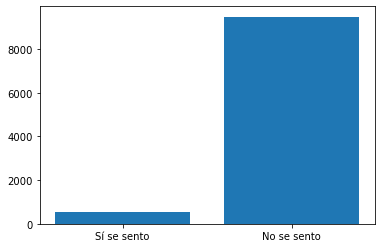

In [92]:
n_experimentos= 10000
u_en_su_asiento= 0
random.seed(0)

for viaje in range(n_experimentos):
    usuarios= hacer_experimento( asignar_asientos() )
    u_en_su_asiento+= 1 if usuarios['usuario_40'][0] == usuarios['usuario_40'][2] else 0
    
plt.bar(['Sí se sento', 'No se sento'],[u_en_su_asiento, n_experimentos - u_en_su_asiento]) 
print(f"La probabilidad de que se siente es: {u_en_su_asiento/n_experimentos}")

### Si $U$ no encuentra disponible su asiento, ¿de qué tamaño es la cascada de cambios (número de cambios de asiento)?
Para resolver esta pregunta se realizaron experimentos, y en los casos de que no se sentó en su lugar, se contaron lo números de cambios realizados para que el último se siente en su lugar

In [132]:
n_experimentos= 1000
p= sorted([ random.random() for _ in range(10) ])
l_p= []

random.seed(0)
for pro in p:
    l_cambios= []
    for viaje in range(n_experimentos):
        usuarios= hacer_experimento( asignar_asientos(p=pro) )
        usuario= 'usuario_40'
        asiento_asg= usuarios[usuario][0]
        asiento_tmd= usuarios[usuario][2]
        n_cambios= 0

        while( asiento_tmd != asiento_asg ):
            usuarios, usuario, asiento_tmd= cambiar_asientos( usuarios, usuario, asiento_tmd)
            n_cambios+= 1
        l_cambios.append( n_cambios )
    l_p.append( l_cambios )

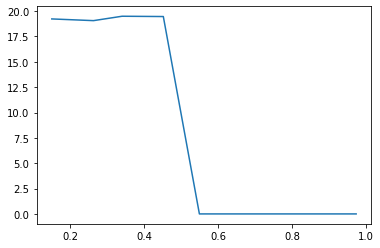

In [133]:
cambios_mean= [ sum(lista)/len(lista) for lista in l_p ]
plt.plot(p, cambios_mean)

### ¿Cuál es el número máximo de cambios de asiento?
Para mis experimentos fue 19